## Display Training Curve

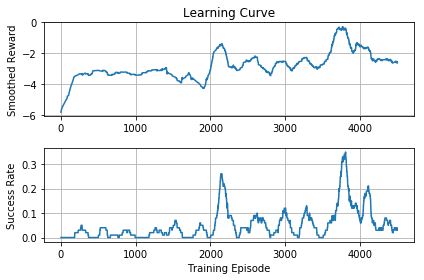

In [10]:
import numpy as np
from matplotlib import pyplot as plt
reward = np.load('reward_log.npy')

def smooth(y, radius=100, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

    
def moving_sum(y, window=100):
    c = y.cumsum()
    c[window:] = c[window:] - c[:-window]
    return c/float(window)
    
success_list=np.zeros(len(reward))
success_list[np.where(reward>-0)]=1  # reward larger than 0 indicates successful grasping

early_stop=4500

fig, axs = plt.subplots(2)
# fig.suptitle('Training')
# plot smoothed reward curve
axs[0].plot(smooth(reward[:early_stop], radius=100))
axs[0].set_title('Learning Curve')
axs[0].set_ylabel('Smoothed Reward')
axs[0].grid()
# plot the success event, as 1, otherwise 0
# axs[1].plot(success_list[:early_stop])
axs[1].plot(moving_sum(success_list[:early_stop]))
# axs[1].set_title('Success Rate')
axs[1].set_xlabel('Training Episode')
axs[1].set_ylabel('Success Rate')
axs[1].grid()
plt.tight_layout()
plt.savefig('training.pdf')
plt.show()


In [13]:
import numpy as np
np.random.exponential(0.0)

0.0